##### This notebook shows how to create and save epochs of the ASR pre-processed data

###### It requires the .fif events file output from the "read_raw_data" notebook and the .fif ASR pre-processed data from the "ASR_processing" notebook


In [2]:
import mne 
import numpy as np
import matplotlib.pyplot as plt

from utils.utils import create_name

mne.set_log_level(verbose='WARNING')

%matplotlib qt

In [3]:
# Read the raw and events from the output of the "read_raw_data" notebook

# Define the subject and the folder where the data is located
subject = 41
data_folder = r"C:\Users\andresfs\OneDrive - NTNU\Datasets\Dataset MI - GigaScience\Derivates"

# Read the ASR processed data
fname_ASR = create_name(subject,data_folder,type='ASR')
raw_ASR = mne.io.read_raw_fif(fname_ASR,preload=True)

# Read only the motor imagery events 
fname_events = create_name(subject,data_folder,type='MI_eve')
events_MI = mne.read_events(fname_events)
event_id_MI = {'MI_Right':9, 'MI_Left':10}


C:\Users\andresfs\AppData\Local\Temp\ipykernel_16744\1591515778.py:9: RuntimeWarning: This filename (C:\Users\andresfs\OneDrive - NTNU\Datasets\Dataset MI - GigaScience\Derivates\s41_ASR.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_ASR = mne.io.read_raw_fif(fname_ASR,preload=True)


In [4]:
# Create Epoch
epochs_ASR = mne.Epochs(raw_ASR, events_MI, event_id_MI, tmin=-1.95, tmax=4.95, picks=('eeg'), baseline=None, preload=True)

# Common Average Reference as a projection
epochs_ASR.set_eeg_reference(ref_channels='average',projection=True)


Number of events,200
Events,MI_Left: 100MI_Right: 100
Time range,-1.949 – 4.949 s
Baseline,off


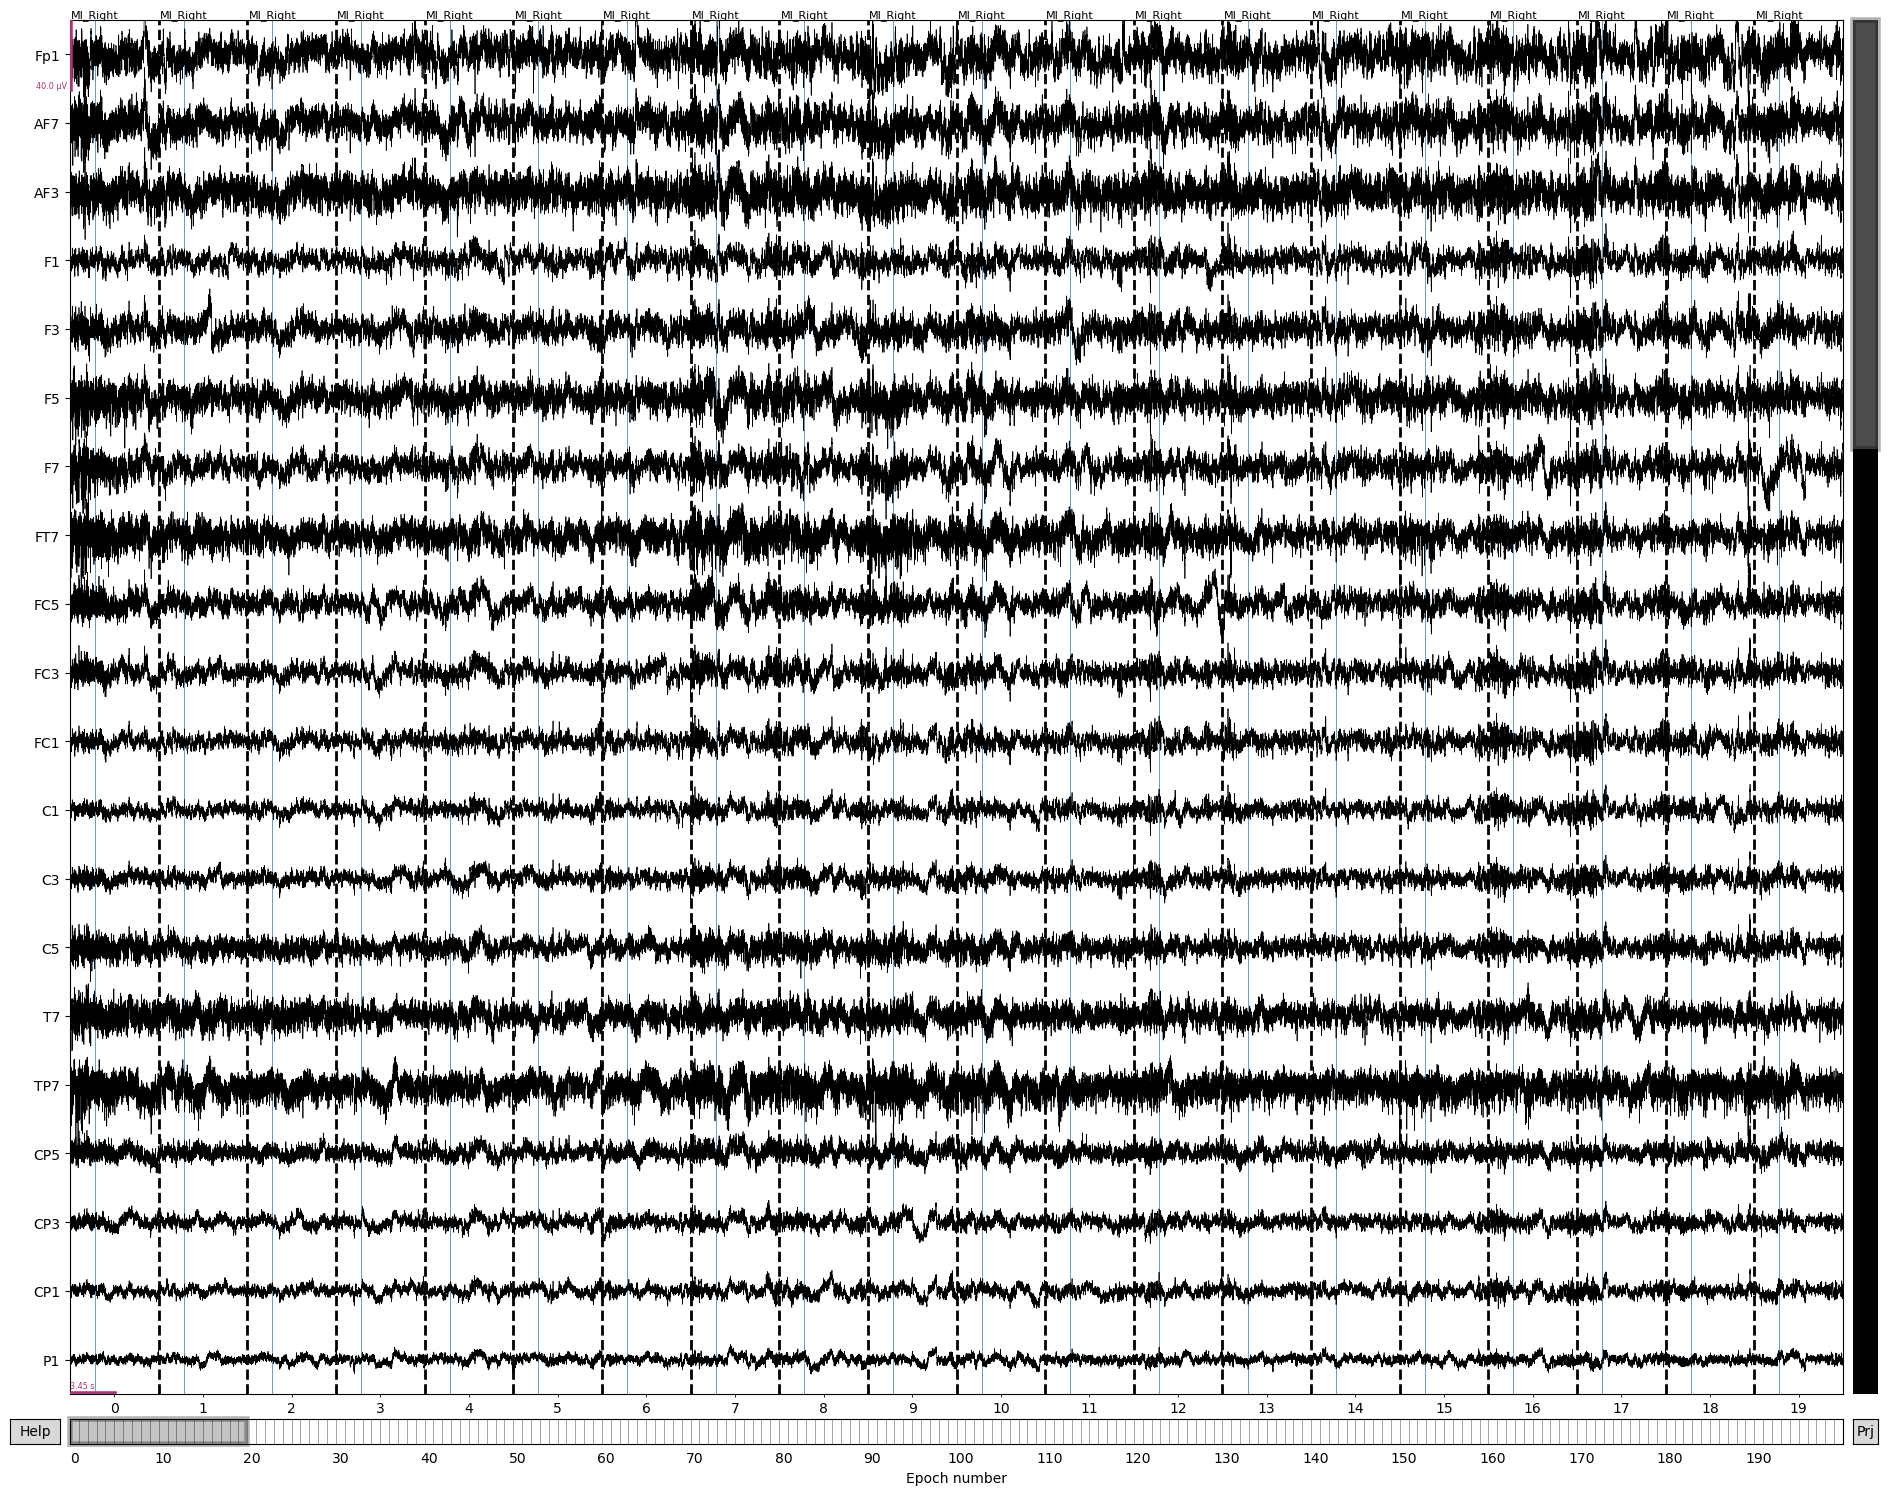

In [5]:
# plot the epochs to check the data
epochs_ASR.plot(events=events_MI, event_id=event_id_MI)

In [6]:
# Save the epochs for the selected channels
fname_epochs = create_name(subject,data_folder,type='ASR_epo')
epochs_ASR.save(fname_epochs,overwrite=True)